In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

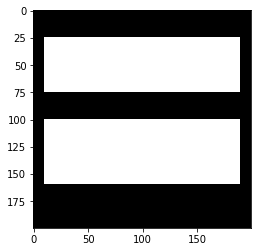

In [4]:
img = np.zeros((200,200),np.uint8)
img[25:75,10:190] = 255
img[100:160,10:190] = 255
# img = cv2.resize(img,(0,0), fx=1780/200, fy=1900/200, interpolation = cv2.INTER_AREA)
img[img>0] = 255
plt.imshow(img,'gray')

In [5]:
cv2.imwrite("img.png",img)

True

In [3]:
import math
def checkAdjacent(ind1,ind2):
    x1,y1 = ind1
    x2,y2 = ind2
    dis = math.sqrt((x2-x1)**2+(y2-y1)**2)
    return (dis < 2)

In [7]:
indexes = np.where(img == 1)
indexes = list(zip(indexes[0],indexes[1]))
lines = []
for index in indexes:
    if lines:
        line = lines[-1]
        if line["end"]:
            if checkAdjacent(line["end"],index):
                lines[-1]["end"] = index
            else:
                lines.append({"start":index,"end":None})
        else:
            lines[-1]["end"] = index
    else:
        lines.append({"start": index,"end":None})

In [10]:
for line in lines:
    print(line)

{'start': (25, 10), 'end': (25, 189)}
{'start': (26, 10), 'end': (26, 189)}
{'start': (27, 10), 'end': (27, 189)}
{'start': (28, 10), 'end': (28, 189)}
{'start': (29, 10), 'end': (29, 189)}
{'start': (30, 10), 'end': (30, 189)}
{'start': (31, 10), 'end': (31, 189)}
{'start': (32, 10), 'end': (32, 189)}
{'start': (33, 10), 'end': (33, 189)}
{'start': (34, 10), 'end': (34, 189)}
{'start': (35, 10), 'end': (35, 189)}
{'start': (36, 10), 'end': (36, 189)}
{'start': (37, 10), 'end': (37, 189)}
{'start': (38, 10), 'end': (38, 189)}
{'start': (39, 10), 'end': (39, 189)}
{'start': (40, 10), 'end': (40, 189)}
{'start': (41, 10), 'end': (41, 189)}
{'start': (42, 10), 'end': (42, 189)}
{'start': (43, 10), 'end': (43, 189)}
{'start': (44, 10), 'end': (44, 189)}
{'start': (45, 10), 'end': (45, 189)}
{'start': (46, 10), 'end': (46, 189)}
{'start': (47, 10), 'end': (47, 189)}
{'start': (48, 10), 'end': (48, 189)}
{'start': (49, 10), 'end': (49, 189)}
{'start': (50, 10), 'end': (50, 189)}
{'start': (5

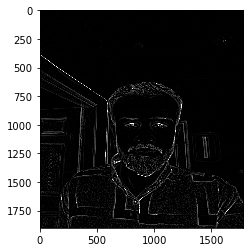

In [18]:
gimg = cv2.imread("img.jpeg",0)
igimg = 255 - gimg
blurred_img = cv2.GaussianBlur(igimg, (21,21),0)
inv_blurred_img = 255 - blurred_img
pencil_sketch_img = cv2.divide(gimg,inv_blurred_img, scale = 256.0)
pencil_sketch_img = cv2.bitwise_not(pencil_sketch_img)
pencil_sketch_img[pencil_sketch_img>127] = 255
img_y, img_x = pencil_sketch_img.shape[:2]
img = cv2.resize(pencil_sketch_img,(0,0), fx=1780/img_x, fy=1900/img_y, interpolation = cv2.INTER_AREA)
plt.imshow(img,'gray')